In [1]:
!pip install pandas==0.23.4
!pip install pandas-gbq==0.8.0 -U

Requirement already up-to-date: pandas-gbq==0.8.0 in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [0]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [0]:
list_var = [
    "median_home_value",
    "median_household_income_in_the_past_12_months",
    "prop_white",
    "prop_black",
    "prop_asian",
    "employment_rate",
    "prop_educ_college_educ",
    "population_density",
    "prop_uninsured",
    "prop_all_25_to_29"    
]

list_prop = [
    "prop_white",
    "prop_black",
    "prop_asian",
    "perc_tech50_avail",
    "employment_rate",
    "prop_educ_college_educ",
    "prop_uninsured",
    "prop_all_25_to_29"
]

list_log = [
    "median_home_value",
    "median_household_income_in_the_past_12_months"
]

In [4]:
for i in list_var:
    print(i, end=", ")

median_home_value, median_household_income_in_the_past_12_months, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, population_density, prop_uninsured, prop_all_25_to_29, 

In [0]:
query_ur_fiber_change = """
SELECT block_group_code,prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2014_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2015_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2016_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)
"""



df = pd.read_gbq(query_ur_fiber_change, project_id='fccdsicapstone-218522', dialect='standard')

In [0]:
for prop in list_prop:
  df[prop] *= 100

In [0]:
def viz(df, var, log):
    """ Visualize perc_tech50_avail with a dependent variable
    
    Params:
        df (dataframe)
        var (str): name of the dependent variable
        log (bool): whether to use log(var)
    """    
    plt.figure(figsize=(13,9))
    if not log:        
        plt.scatter(df["perc_tech50_avail"], df[var], s=2, alpha=0.05)
        plt.show()
    else:
        df["log_"+var] = np.log(df[var])
        plt.scatter(df["perc_tech50_avail"], df["log_"+var], s=2, alpha=0.05)
        plt.show()
    

In [0]:
def mix_model(df, var):
    """ Fit a linear mixed model: var ~ perc_tech50_avail
    
    Params:
        df (dataframe)
        var (str): name of the dependent variable        
    """
    md = smf.mixedlm(var+" ~ perc_tech50_avail",
                 df[df[var].notnull()],
                 groups=df[df[var].notnull()]["block_group_code"])
    mdf = md.fit()
    return mdf

median_home_value


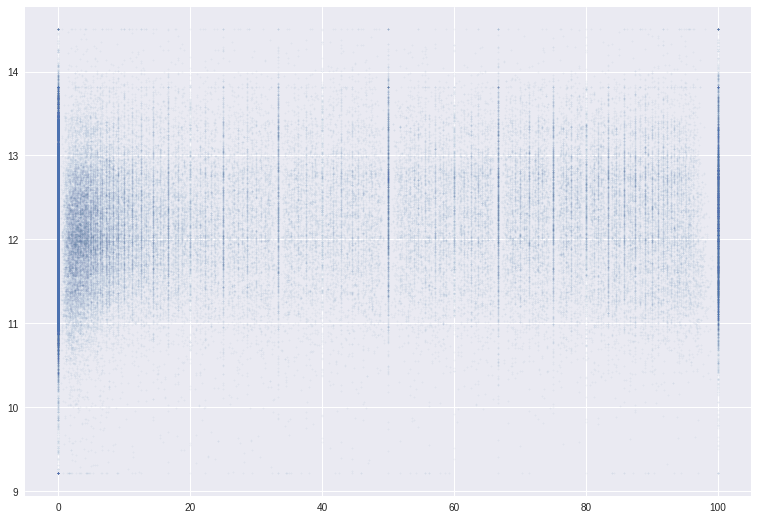

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      median_home_value
No. Observations:      119760       Method:                  REML             
No. Groups:            40785        Scale:                   2118865640.4377  
Min. group size:       1            Likelihood:              -1539488.1212    
Max. group size:       3            Converged:               Yes              
Mean group size:       2.9                                                    
------------------------------------------------------------------------------
                       Coef.      Std.Err.    z    P>|z|   [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              245620.064 1059.926 231.733 0.000 243542.648 247697.480
perc_tech50_avail         235.116    6.708  35.048 0.000    221.968    248.264
groups RE         43398506023.656 8276.132                               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


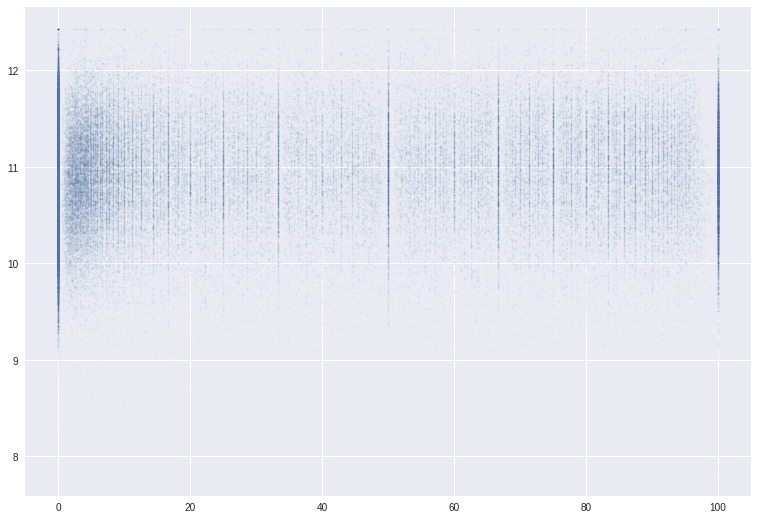

                           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: median_household_income_in_the_past_12_months
No. Observations: 119087  Method:             REML                                         
No. Groups:       40781   Scale:              2611710373578839.0000                        
Min. group size:  1       Likelihood:         -2282675.7911                                
Max. group size:  3       Converged:          Yes                                          
Mean group size:  2.9                                                                      
--------------------------------------------------------------------------------------------
                          Coef.        Std.Err.      z     P>|z|     [0.025        0.975]   
--------------------------------------------------------------------------------------------
Intercept               -2090810.129  194987.436  -10.723  0.000  -2472978.480  -1708641.778
perc_tech50

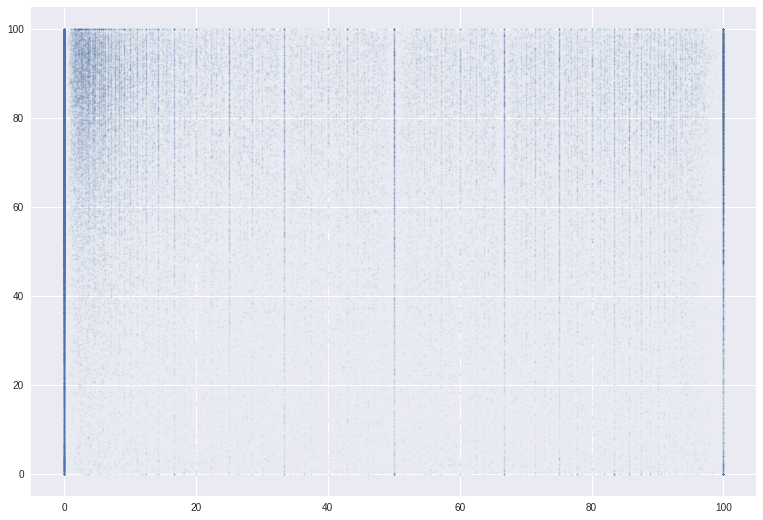

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_white  
No. Observations:   119760   Method:              REML        
No. Groups:         40785    Scale:               23.3171     
Min. group size:    1        Likelihood:          -446093.0241
Max. group size:    3        Converged:           Yes         
Mean group size:    2.9                                       
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          71.622    0.122 587.437 0.000 71.383 71.861
perc_tech50_avail  -0.005    0.001  -6.580 0.000 -0.006 -0.003
groups RE         579.526    1.050                            

prop_black


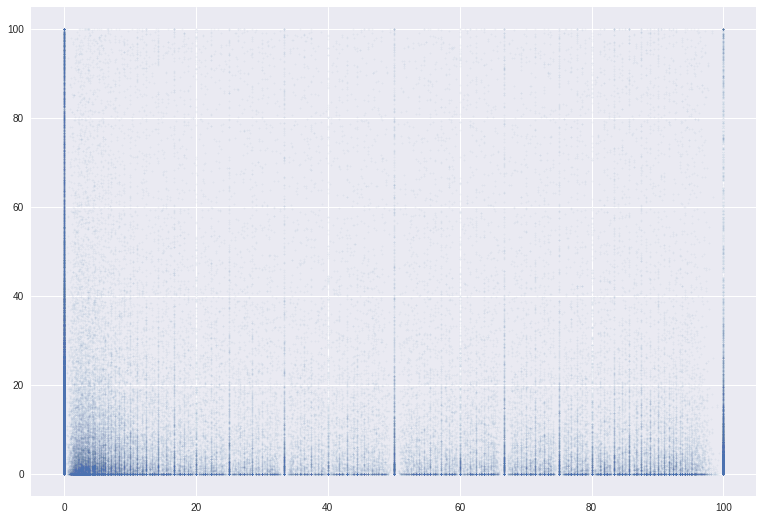

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_black  
No. Observations:   119760   Method:              REML        
No. Groups:         40785    Scale:               11.2872     
Min. group size:    1        Likelihood:          -413193.1586
Max. group size:    3        Converged:           Yes         
Mean group size:    2.9                                       
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          13.779    0.109 126.199 0.000 13.565 13.993
perc_tech50_avail  -0.001    0.000  -1.728 0.084 -0.002  0.000
groups RE         473.137    1.225                            

prop_asian


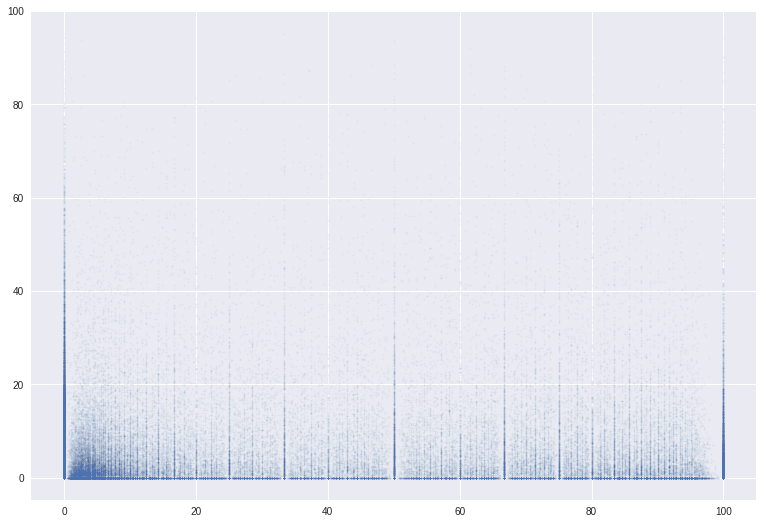

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  prop_asian  
No. Observations:  119760   Method:              REML        
No. Groups:        40785    Scale:               6.2008      
Min. group size:   1        Likelihood:          -356507.2006
Max. group size:   3        Converged:           Yes         
Mean group size:   2.9                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          5.852    0.049 118.621 0.000  5.756  5.949
perc_tech50_avail  0.003    0.000   7.922 0.000  0.002  0.004
groups RE         92.256    0.327                            

employment_rate


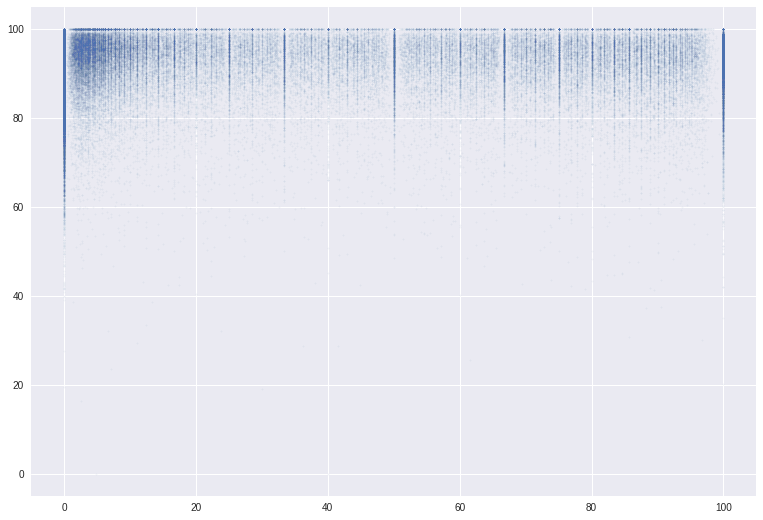

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: employment_rate
No. Observations:  119756  Method:             REML           
No. Groups:        40784   Scale:              10.4136        
Min. group size:   1       Likelihood:         -361549.9518   
Max. group size:   3       Converged:          Yes            
Mean group size:   2.9                                        
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         91.130    0.036 2562.135 0.000 91.060 91.200
perc_tech50_avail  0.015    0.000   33.329 0.000  0.014  0.016
groups RE         40.701    0.120                             

prop_educ_college_educ


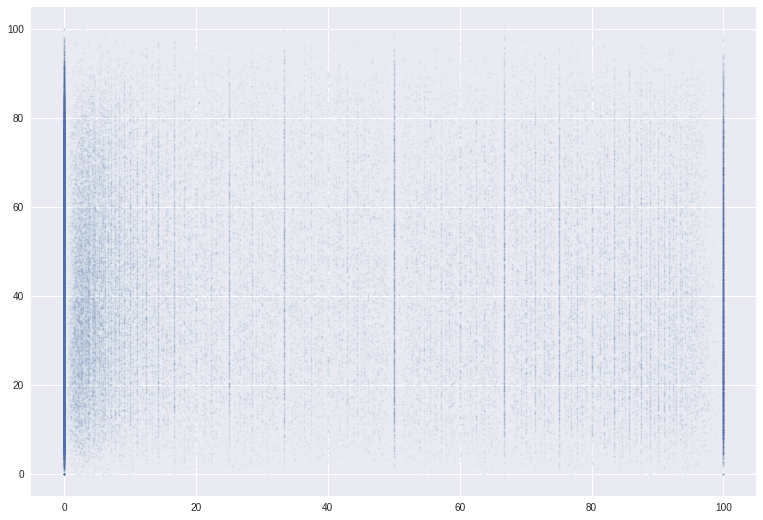

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_educ_college_educ
No. Observations: 119760  Method:             REML                  
No. Groups:       40785   Scale:              16.9752               
Min. group size:  1       Likelihood:         -428945.1414          
Max. group size:  3       Converged:          Yes                   
Mean group size:  2.9                                               
---------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept            41.656     0.109  383.080  0.000  41.443  41.870
perc_tech50_avail     0.014     0.001   22.422  0.000   0.012   0.015
groups RE           462.758     0.981                                

population_density


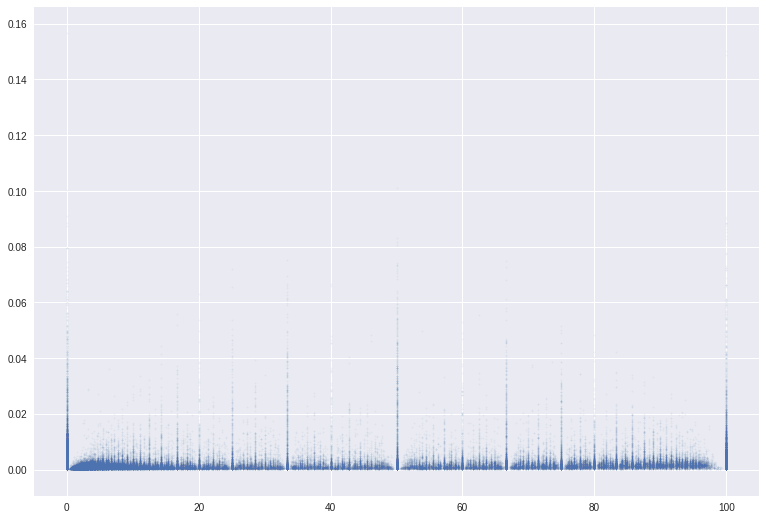

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: population_density
No. Observations: 119760  Method:             REML              
No. Groups:       40785   Scale:              0.0000            
Min. group size:  1       Likelihood:         619329.0841       
Max. group size:  3       Converged:          Yes               
Mean group size:  2.9                                           
----------------------------------------------------------------
                      Coef. Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             0.003    0.000 109.371 0.000  0.003  0.003
perc_tech50_avail     0.000    0.000   7.148 0.000  0.000  0.000
groups RE             0.000    0.000                            

prop_uninsured


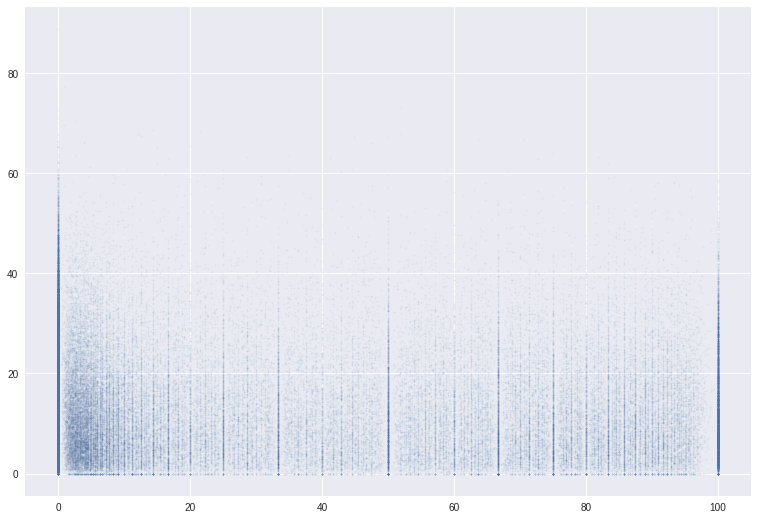

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prop_uninsured
No. Observations:  119760  Method:             REML          
No. Groups:        40785   Scale:              12.9048       
Min. group size:   1       Likelihood:         -386894.8393  
Max. group size:   3       Converged:          Yes           
Mean group size:   2.9                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         14.290    0.052 273.914 0.000 14.188 14.393
perc_tech50_avail -0.025    0.001 -49.315 0.000 -0.026 -0.024
groups RE         96.856    0.244                            

prop_all_25_to_29


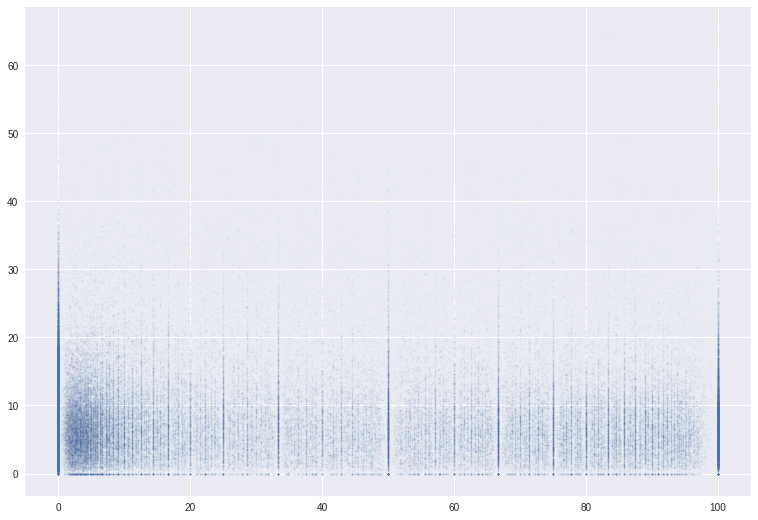

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_all_25_to_29
No. Observations: 119760  Method:             REML             
No. Groups:       40785   Scale:              4.9193           
Min. group size:  1       Likelihood:         -324204.7759     
Max. group size:  3       Converged:          Yes              
Mean group size:  2.9                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            7.803    0.029 270.606 0.000  7.746  7.859
perc_tech50_avail    0.000    0.000   0.181 0.856 -0.001  0.001
groups RE           28.609    0.118                            



In [9]:
for var in list_var:    
    print(var)
    viz(df, var, var in list_log)
    model = mix_model(df, var)
    print(model.summary())

median_home_value


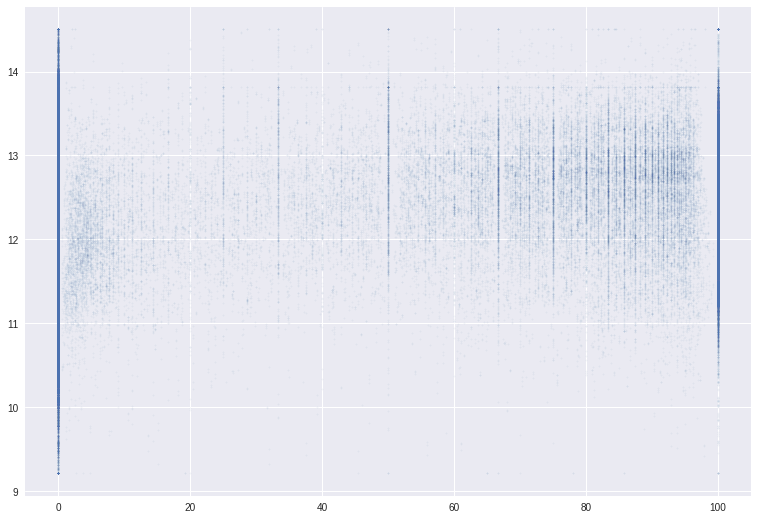

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      median_home_value
No. Observations:      316374       Method:                  REML             
No. Groups:            107933       Scale:                   2352181387.7468  
Min. group size:       1            Likelihood:              -4080838.9289    
Max. group size:       3            Converged:               Yes              
Mean group size:       2.9                                                    
------------------------------------------------------------------------------
                       Coef.      Std.Err.    z    P>|z|   [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              217156.455  740.346 293.318 0.000 215705.404 218607.506
perc_tech50_avail        1411.204   18.191  77.576 0.000   1375.550   1446.858
groups RE         45621304879.307 5078.462                               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


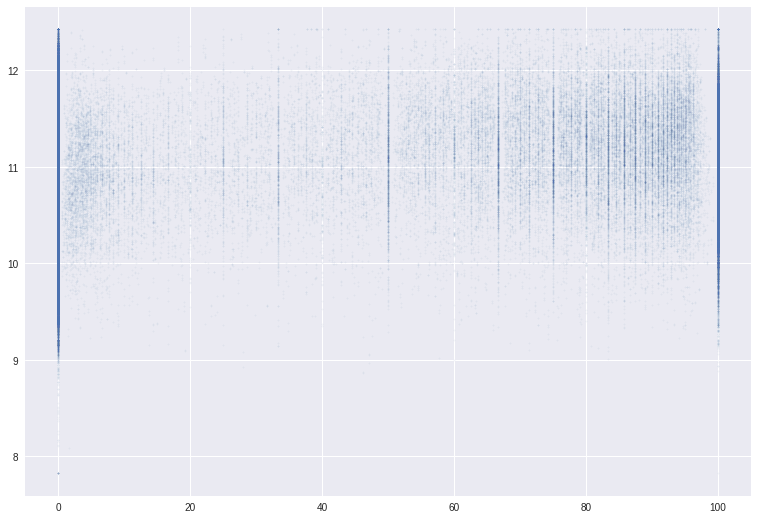

                           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: median_household_income_in_the_past_12_months
No. Observations: 314029  Method:             REML                                         
No. Groups:       107925  Scale:              3343425197851414.0000                        
Min. group size:  1       Likelihood:         -6058170.0570                                
Max. group size:  3       Converged:          Yes                                          
Mean group size:  2.9                                                                      
---------------------------------------------------------------------------------------------
                       Coef.        Std.Err.       z      P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------------------
Intercept           -4832370.269   116540.597   -41.465   0.000   -5060785.642   -4603954.897
perc_te

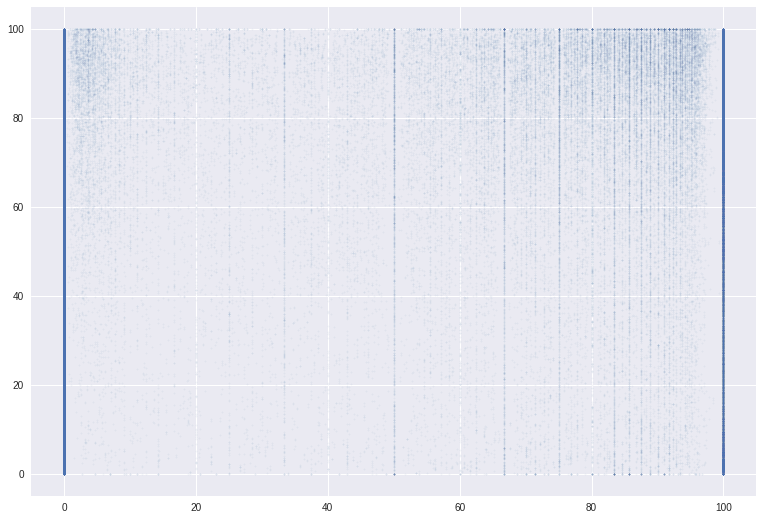

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  prop_white   
No. Observations:  316374   Method:              REML         
No. Groups:        107933   Scale:               24.0666      
Min. group size:   1        Likelihood:          -1196601.6700
Max. group size:   3        Converged:           Yes          
Mean group size:   2.9                                        
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          70.203    0.095 736.529 0.000 70.016 70.390
perc_tech50_avail  -0.042    0.002 -18.005 0.000 -0.047 -0.038
groups RE         761.418    0.833                            

prop_black


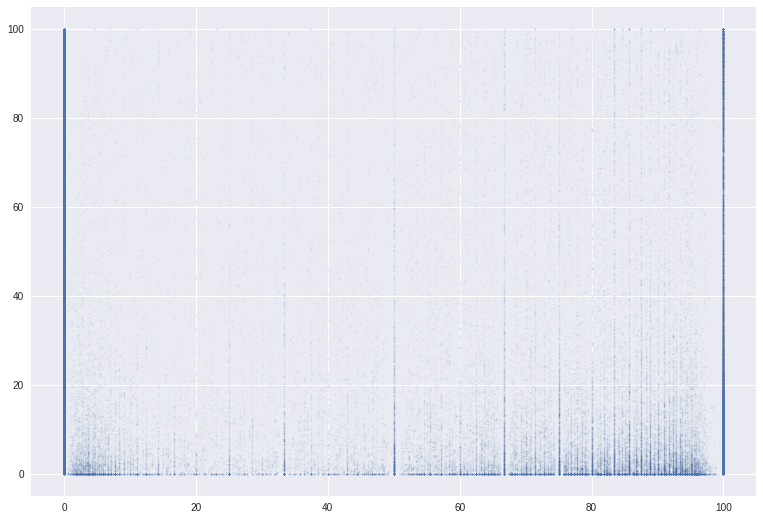

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  prop_black   
No. Observations:  316374   Method:              REML         
No. Groups:        107933   Scale:               12.7062      
Min. group size:   1        Likelihood:          -1122015.0804
Max. group size:   3        Converged:           Yes          
Mean group size:   2.9                                        
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          15.998    0.088 180.787 0.000 15.825 16.172
perc_tech50_avail   0.016    0.002   7.360 0.000  0.012  0.020
groups RE         659.122    0.988                            

prop_asian


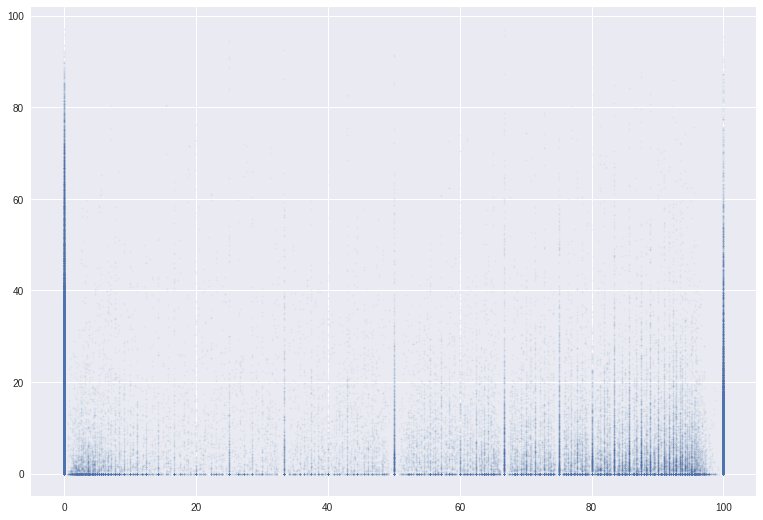

            Mixed Linear Model Regression Results
Model:             MixedLM  Dependent Variable:  prop_asian  
No. Observations:  316374   Method:              REML        
No. Groups:        107933   Scale:               5.8467      
Min. group size:   1        Likelihood:          -938980.2063
Max. group size:   3        Converged:           Yes         
Mean group size:   2.9                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept          4.799    0.034 139.704 0.000  4.731  4.866
perc_tech50_avail  0.027    0.001  32.149 0.000  0.025  0.029
groups RE         97.931    0.219                            

employment_rate


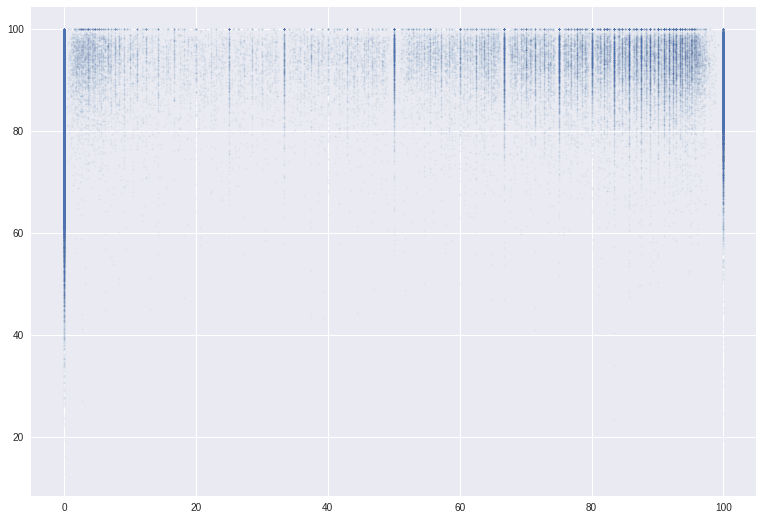

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: employment_rate
No. Observations:  316367  Method:             REML           
No. Groups:        107932  Scale:              12.7889        
Min. group size:   1       Likelihood:         -989146.3269   
Max. group size:   3       Converged:          Yes            
Mean group size:   2.9                                        
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         90.192    0.026 3512.007 0.000 90.142 90.243
perc_tech50_avail  0.018    0.001   29.167 0.000  0.017  0.020
groups RE         51.415    0.084                             

prop_educ_college_educ


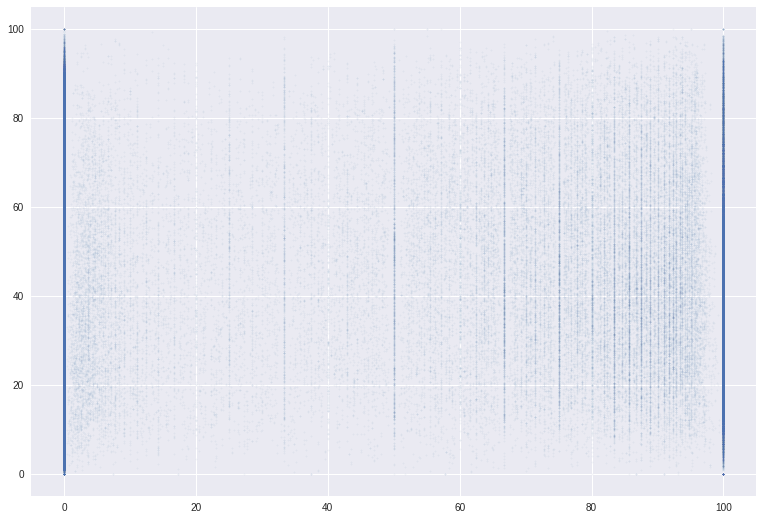

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_educ_college_educ
No. Observations: 316374  Method:             REML                  
No. Groups:       107933  Scale:              17.7575               
Min. group size:  1       Likelihood:         -1132403.0031         
Max. group size:  3       Converged:          Yes                   
Mean group size:  2.9                                               
---------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept            35.513     0.071  503.555  0.000  35.374  35.651
perc_tech50_avail     0.091     0.002   52.592  0.000   0.088   0.095
groups RE           415.228     0.531                                

population_density


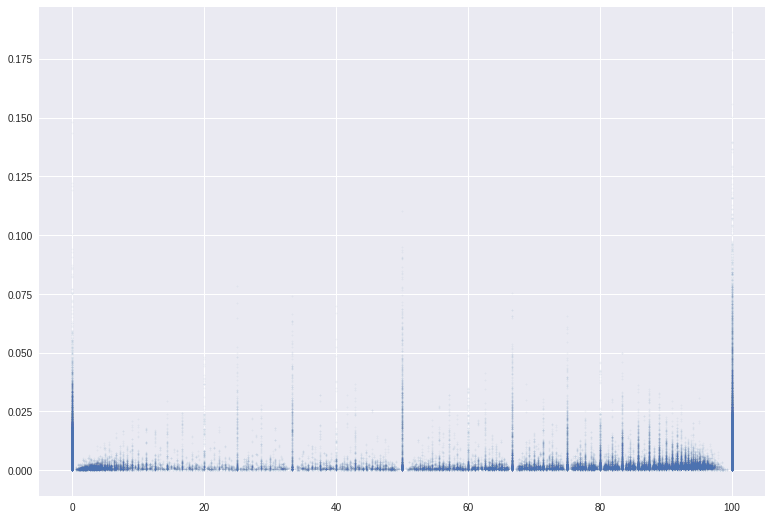

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: population_density
No. Observations: 316374  Method:             REML              
No. Groups:       107933  Scale:              0.0000            
Min. group size:  1       Likelihood:         1582752.8124      
Max. group size:  3       Converged:          Yes               
Mean group size:  2.9                                           
----------------------------------------------------------------
                      Coef. Std.Err.    z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             0.002    0.000 123.662 0.000  0.002  0.002
perc_tech50_avail     0.000    0.000  85.092 0.000  0.000  0.000
groups RE             0.000    0.000                            

prop_uninsured


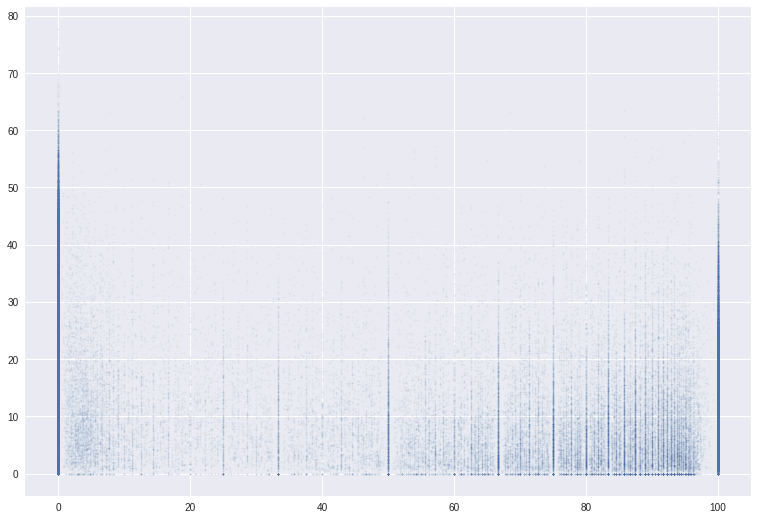

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prop_uninsured
No. Observations:  316374  Method:             REML          
No. Groups:        107933  Scale:              13.2349       
Min. group size:   1       Likelihood:         -1022722.0204 
Max. group size:   3       Converged:          Yes           
Mean group size:   2.9                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         13.724    0.034 404.773 0.000 13.658 13.790
perc_tech50_avail -0.038    0.001 -45.184 0.000 -0.039 -0.036
groups RE         92.778    0.142                            

prop_all_25_to_29


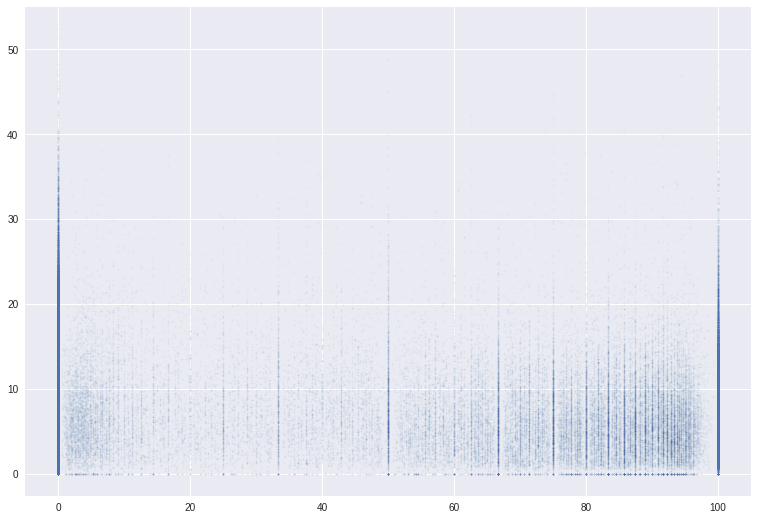

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_all_25_to_29
No. Observations: 316374  Method:             REML             
No. Groups:       107933  Scale:              4.7878           
Min. group size:  1       Likelihood:         -836858.5603     
Max. group size:  3       Converged:          Yes              
Mean group size:  2.9                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            7.103    0.016 439.167 0.000  7.071  7.134
perc_tech50_avail   -0.000    0.000  -0.962 0.336 -0.001  0.000
groups RE           20.490    0.054                            



In [10]:
query_ur_fiber_no_change = """
SELECT block_group_code,prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2014_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2015_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2016_table
WHERE median_home_value > 0 AND perc_urban > 0.8 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)
"""



df = pd.read_gbq(query_ur_fiber_no_change, project_id='fccdsicapstone-218522', dialect='standard')
for prop in list_prop:
  df[prop] *= 100

for var in list_var:    
    print(var)
    viz(df, var, var in list_log)
    model = mix_model(df, var)
    print(model.summary())

median_home_value


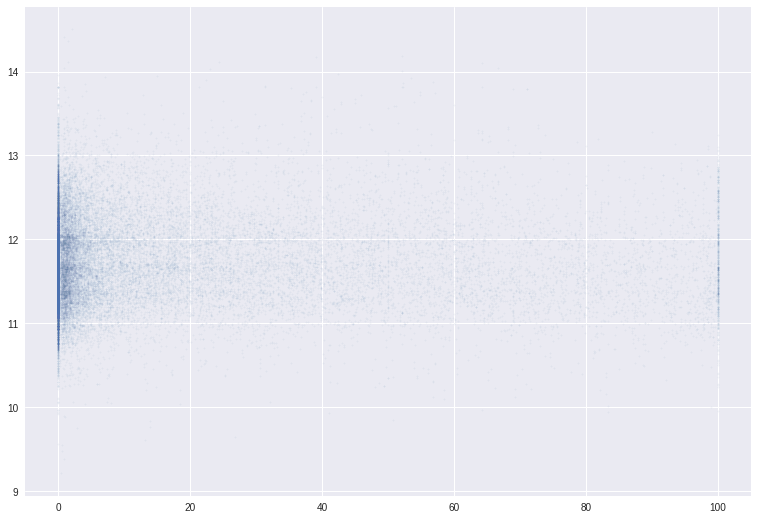

                    Mixed Linear Model Regression Results
Model:                  MixedLM     Dependent Variable:     median_home_value
No. Observations:       33112       Method:                 REML             
No. Groups:             11136       Scale:                  303614695.0631   
Min. group size:        1           Likelihood:             -395391.3137     
Max. group size:        3           Converged:              Yes              
Mean group size:        3.0                                                  
-----------------------------------------------------------------------------
                      Coef.      Std.Err.    z    P>|z|   [0.025     0.975]  
-----------------------------------------------------------------------------
Intercept             144675.134  919.574 157.328 0.000 142872.801 146477.466
perc_tech50_avail         48.852    7.828   6.241 0.000     33.510     64.193
groups RE         9124619686.181 8712.614                                    

media

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


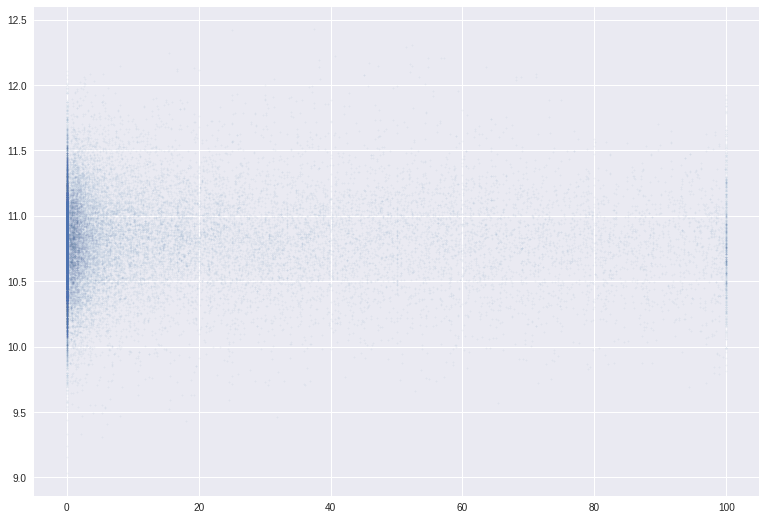

                           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: median_household_income_in_the_past_12_months
No. Observations: 33014   Method:             REML                                         
No. Groups:       11136   Scale:              1422711545683103.5000                        
Min. group size:  1       Likelihood:         -622772.1548                                 
Max. group size:  3       Converged:          Yes                                          
Mean group size:  3.0                                                                      
---------------------------------------------------------------------------------------------
                        Coef.        Std.Err.      z      P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------------------
Intercept            -2178327.953   245589.214   -8.870   0.000   -2659673.966   -1696981.939
perc_te

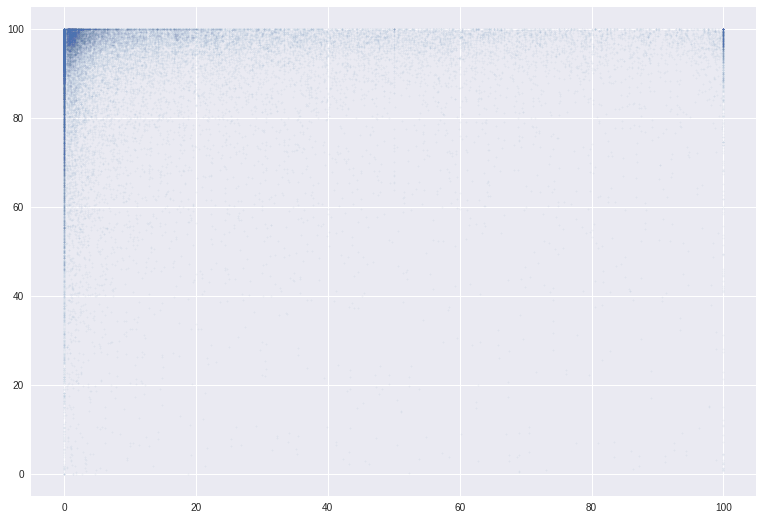

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_white  
No. Observations:   33112    Method:              REML        
No. Groups:         11136    Scale:               8.3205      
Min. group size:    1        Likelihood:          -106844.9579
Max. group size:    3        Converged:           Yes         
Mean group size:    3.0                                       
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          89.828    0.149 604.892 0.000 89.537 90.119
perc_tech50_avail  -0.001    0.001  -0.454 0.650 -0.003  0.002
groups RE         237.587    1.373                            

prop_black


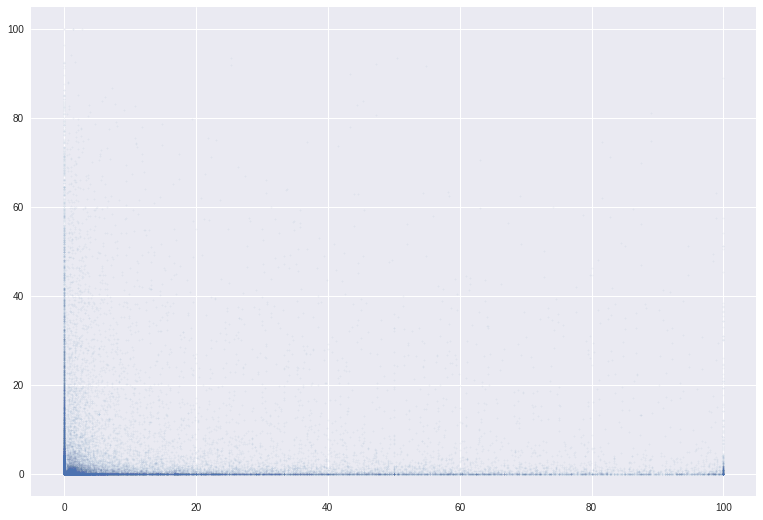

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_black 
No. Observations:   33112    Method:              REML       
No. Groups:         11136    Scale:               4.2693     
Min. group size:    1        Likelihood:          -96584.4922
Max. group size:    3        Converged:           Yes        
Mean group size:    3.0                                      
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           4.880    0.114 42.810 0.000  4.657  5.104
perc_tech50_avail  -0.002    0.001 -2.456 0.014 -0.004 -0.000
groups RE         140.614    1.133                           

prop_asian


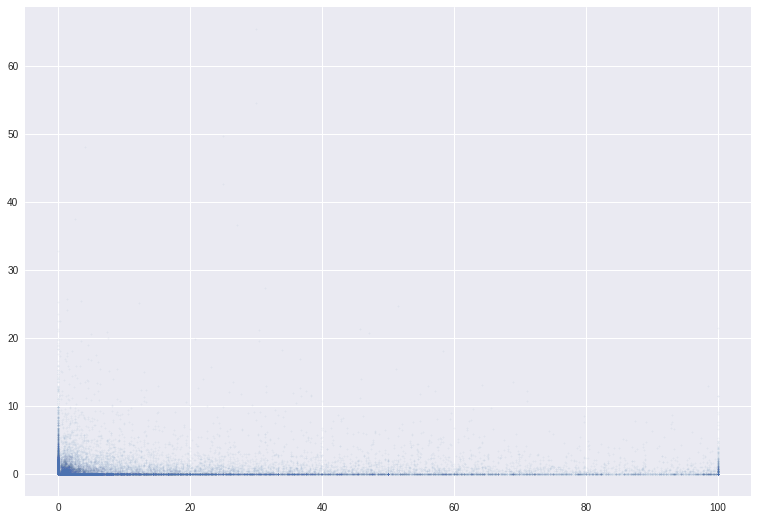

           Mixed Linear Model Regression Results
Model:              MixedLM Dependent Variable: prop_asian 
No. Observations:   33112   Method:             REML       
No. Groups:         11136   Scale:              0.5432     
Min. group size:    1       Likelihood:         -51671.9979
Max. group size:    3       Converged:          Yes        
Mean group size:    3.0                                    
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.554    0.016 34.431 0.000  0.523  0.586
perc_tech50_avail 0.000    0.000  1.069 0.285 -0.000  0.001
groups RE         2.423    0.058                           

employment_rate


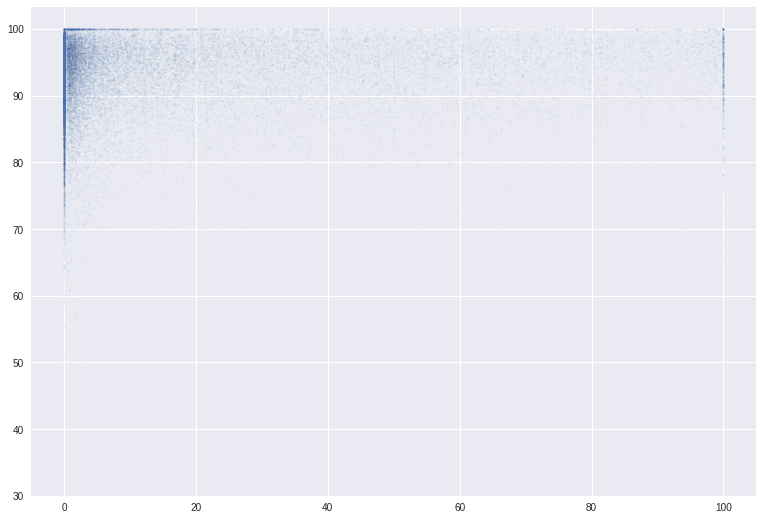

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: employment_rate
No. Observations:  33110   Method:             REML           
No. Groups:        11135   Scale:              8.0485         
Min. group size:   1       Likelihood:         -95104.2244    
Max. group size:   3       Converged:          Yes            
Mean group size:   3.0                                        
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         92.506    0.056 1647.406 0.000 92.396 92.616
perc_tech50_avail  0.014    0.001   12.459 0.000  0.012  0.016
groups RE         28.464    0.182                             

prop_educ_college_educ


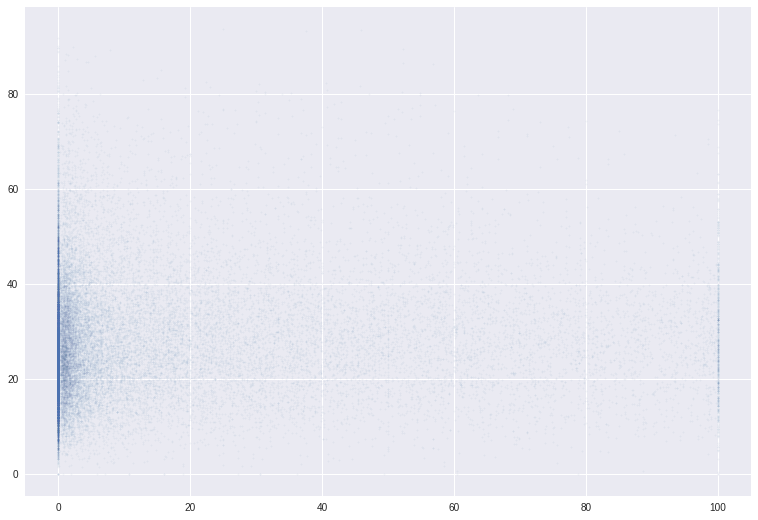

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_educ_college_educ
No. Observations: 33112   Method:             REML                  
No. Groups:       11136   Scale:              11.6581               
Min. group size:  1       Likelihood:         -107967.8583          
Max. group size:  3       Converged:          Yes                   
Mean group size:  3.0                                               
---------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept            27.922     0.119  234.377  0.000  27.689  28.156
perc_tech50_avail     0.015     0.001    9.771  0.000   0.012   0.018
groups RE           147.214     0.728                                

population_density


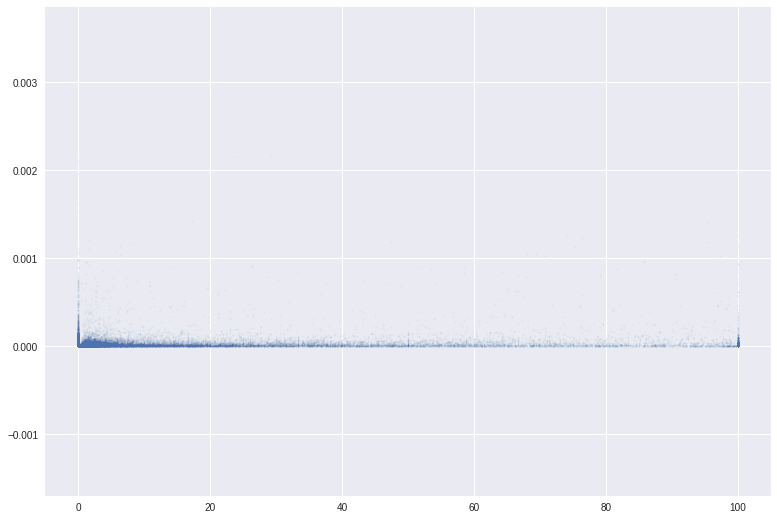

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: population_density
No. Observations: 33112   Method:             REML              
No. Groups:       11136   Scale:              0.0000            
Min. group size:  1       Likelihood:         309488.1981       
Max. group size:  3       Converged:          Yes               
Mean group size:  3.0                                           
-----------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.000     0.000  46.821  0.000   0.000   0.000
perc_tech50_avail  0.000     0.000   2.317  0.020   0.000   0.000
groups RE          0.000     0.000                               

prop_uninsured


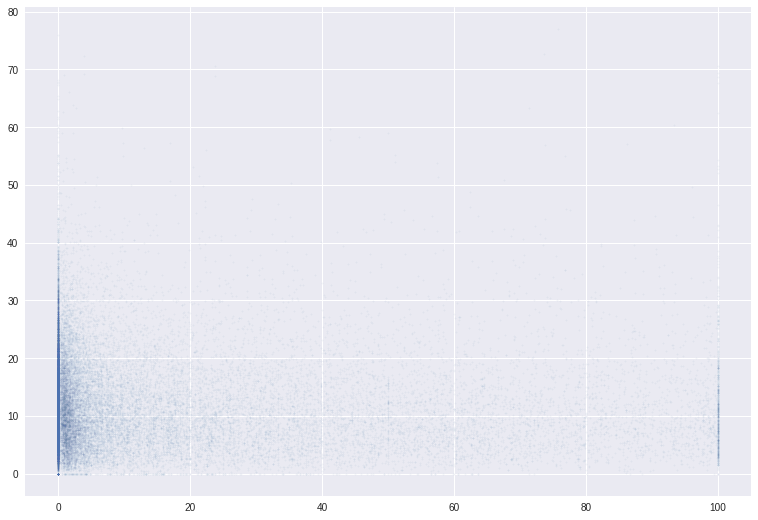

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prop_uninsured
No. Observations:  33112   Method:             REML          
No. Groups:        11136   Scale:              9.9113        
Min. group size:   1       Likelihood:         -101144.6276  
Max. group size:   3       Converged:          Yes           
Mean group size:   3.0                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         12.880    0.077 166.727 0.000 12.729 13.032
perc_tech50_avail -0.022    0.001 -16.898 0.000 -0.025 -0.020
groups RE         57.779    0.320                            

prop_all_25_to_29


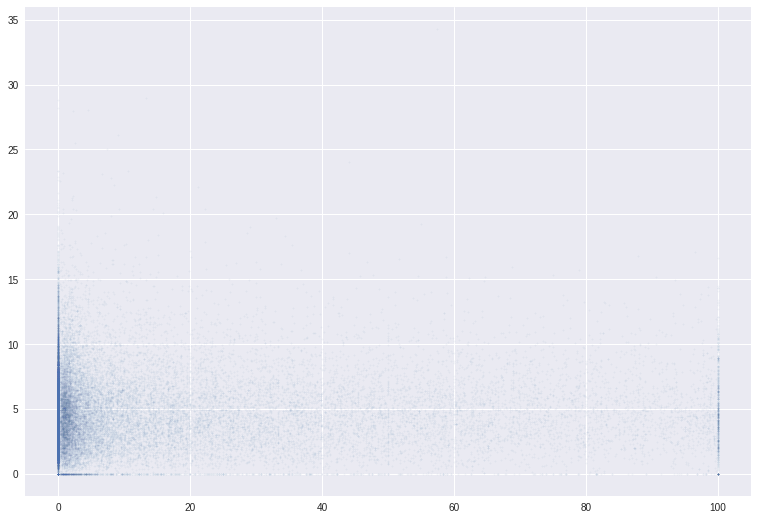

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_all_25_to_29
No. Observations: 33112   Method:             REML             
No. Groups:       11136   Scale:              2.3814           
Min. group size:  1       Likelihood:         -73897.3513      
Max. group size:  3       Converged:          Yes              
Mean group size:  3.0                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            4.858    0.028 173.374 0.000  4.803  4.912
perc_tech50_avail   -0.000    0.001  -0.828 0.408 -0.002  0.001
groups RE            6.833    0.082                            



In [11]:
query_ra_fiber_change = """
SELECT block_group_code,prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2014_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2015_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2016_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code NOT IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)
"""



df = pd.read_gbq(query_ra_fiber_change, project_id='fccdsicapstone-218522', dialect='standard')
for prop in list_prop:
  df[prop] *= 100

for var in list_var:    
    print(var)
    viz(df, var, var in list_log)
    model = mix_model(df, var)
    print(model.summary())

median_home_value


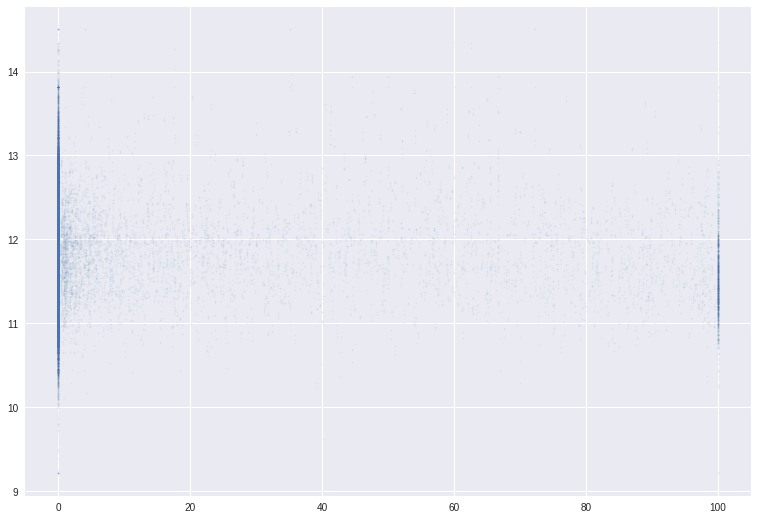

                    Mixed Linear Model Regression Results
Model:                 MixedLM      Dependent Variable:      median_home_value
No. Observations:      80489        Method:                  REML             
No. Groups:            27153        Scale:                   543820930.3156   
Min. group size:       1            Likelihood:              -981835.7650     
Max. group size:       3            Converged:               Yes              
Mean group size:       3.0                                                    
------------------------------------------------------------------------------
                       Coef.      Std.Err.    z    P>|z|   [0.025     0.975]  
------------------------------------------------------------------------------
Intercept              155440.926  726.590 213.932 0.000 154016.837 156865.016
perc_tech50_avail         -40.221   35.951  -1.119 0.263   -110.685     30.242
groups RE         13177110365.812 6042.198                               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log
  


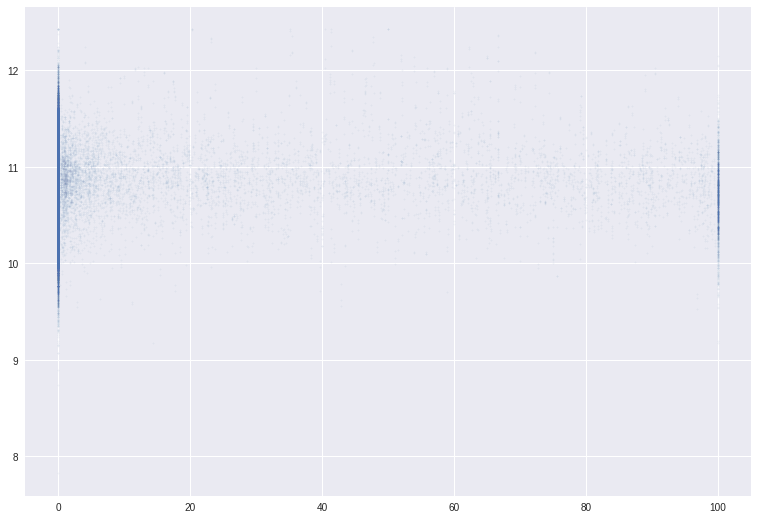

                           Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: median_household_income_in_the_past_12_months
No. Observations: 80150   Method:             REML                                         
No. Groups:       27153   Scale:              2048077183762323.7500                        
Min. group size:  1       Likelihood:         -1526575.3847                                
Max. group size:  3       Converged:          Yes                                          
Mean group size:  3.0                                                                      
---------------------------------------------------------------------------------------------
                       Coef.        Std.Err.       z      P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------------------------
Intercept           -3079457.338   165689.225   -18.586   0.000   -3404202.251   -2754712.424
perc_te

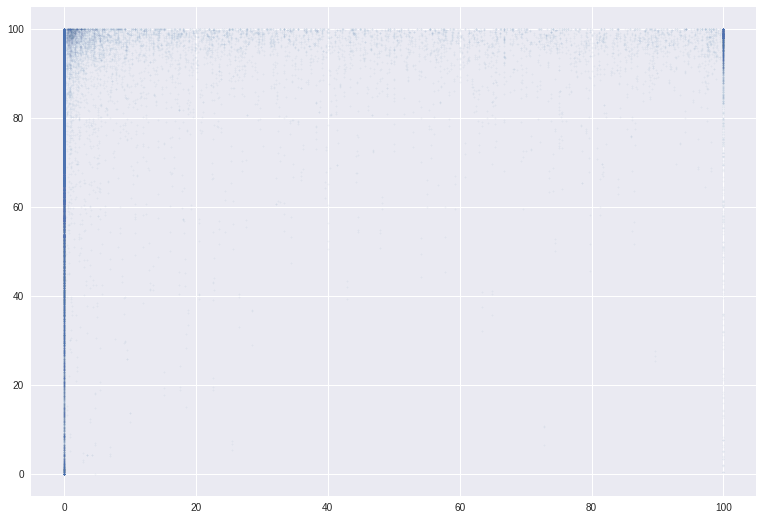

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_white  
No. Observations:   80489    Method:              REML        
No. Groups:         27153    Scale:               9.7053      
Min. group size:    1        Likelihood:          -267616.6655
Max. group size:    3        Converged:           Yes         
Mean group size:    3.0                                       
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept          88.119    0.112 789.739 0.000 87.900 88.338
perc_tech50_avail   0.062    0.006  11.159 0.000  0.051  0.072
groups RE         311.820    1.067                            

prop_black


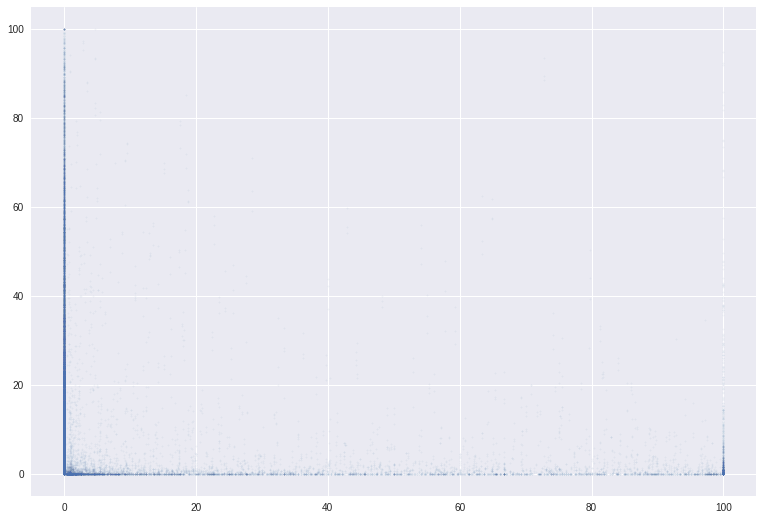

            Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  prop_black  
No. Observations:   80489    Method:              REML        
No. Groups:         27153    Scale:               5.2099      
Min. group size:    1        Likelihood:          -246030.4190
Max. group size:    3        Converged:           Yes         
Mean group size:    3.0                                       
--------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept           6.439    0.093  69.361 0.000  6.257  6.621
perc_tech50_avail  -0.048    0.005 -10.367 0.000 -0.057 -0.039
groups RE         216.328    1.008                            

prop_asian


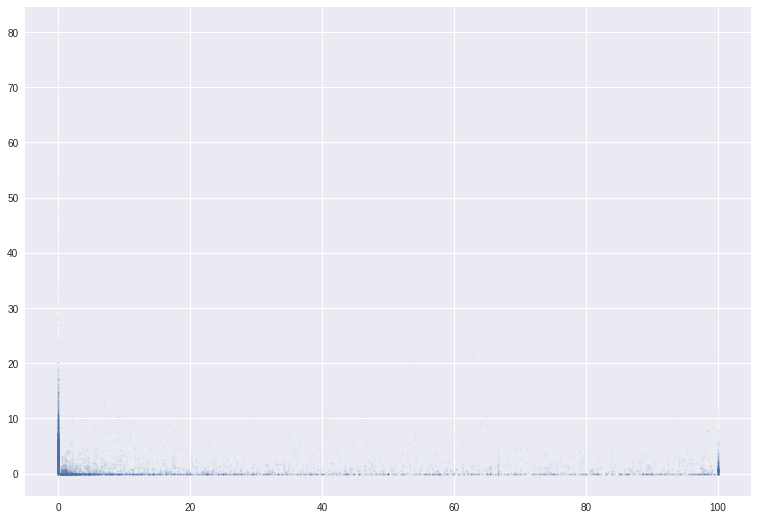

           Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prop_asian  
No. Observations:  80489   Method:             REML        
No. Groups:        27153   Scale:              0.5690      
Min. group size:   1       Likelihood:         -126460.0318
Max. group size:   3       Converged:          Yes         
Mean group size:   3.0                                     
-----------------------------------------------------------
                  Coef. Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------
Intercept         0.549    0.010 54.934 0.000  0.529  0.569
perc_tech50_avail 0.000    0.000  0.438 0.661 -0.001  0.001
groups RE         2.333    0.035                           

employment_rate


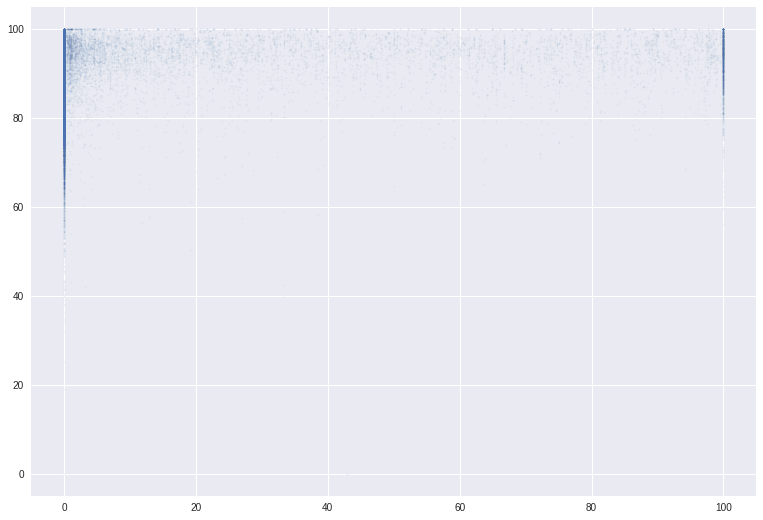

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: employment_rate
No. Observations:  80486   Method:             REML           
No. Groups:        27152   Scale:              9.8324         
Min. group size:   1       Likelihood:         -238509.4332   
Max. group size:   3       Converged:          Yes            
Mean group size:   3.0                                        
--------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept         91.839    0.038 2434.620 0.000 91.765 91.913
perc_tech50_avail  0.017    0.002    9.225 0.000  0.014  0.021
groups RE         32.661    0.122                             

prop_educ_college_educ


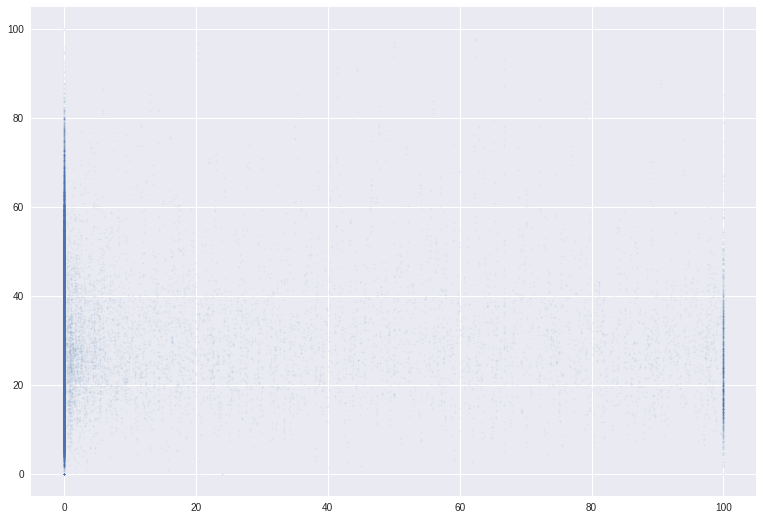

               Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_educ_college_educ
No. Observations: 80489   Method:             REML                  
No. Groups:       27153   Scale:              12.4466               
Min. group size:  1       Likelihood:         -264899.9434          
Max. group size:  3       Converged:          Yes                   
Mean group size:  3.0                                               
---------------------------------------------------------------------
                     Coef.   Std.Err.     z     P>|z|  [0.025  0.975]
---------------------------------------------------------------------
Intercept            27.273     0.079  344.918  0.000  27.118  27.428
perc_tech50_avail     0.018     0.004    4.705  0.000   0.011   0.026
groups RE           154.000     0.473                                

population_density


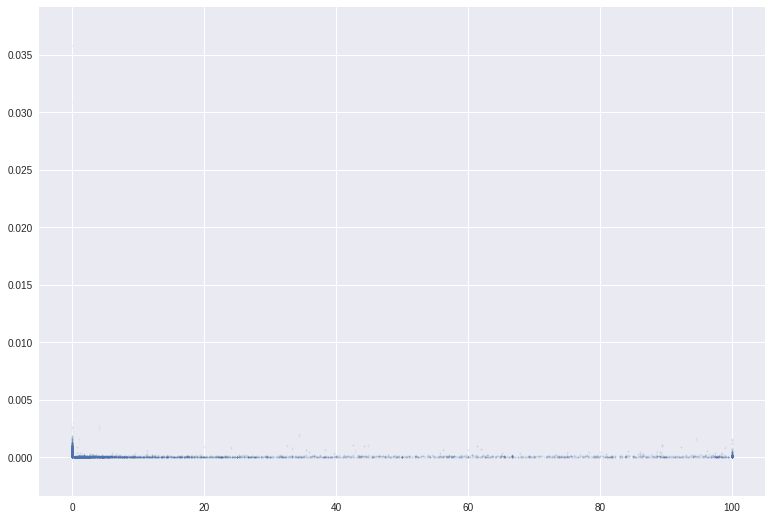

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/mixed_linear_model.py:2019: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: population_density
No. Observations: 80489   Method:             REML              
No. Groups:       27153   Scale:              0.0000            
Min. group size:  1       Likelihood:         676701.6653       
Max. group size:  3       Converged:          Yes               
Mean group size:  3.0                                           
-----------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept          0.000     0.000  30.958  0.000   0.000   0.000
perc_tech50_avail  0.000     0.000   2.513  0.012   0.000   0.000
groups RE          0.000     0.000                               

prop_uninsured


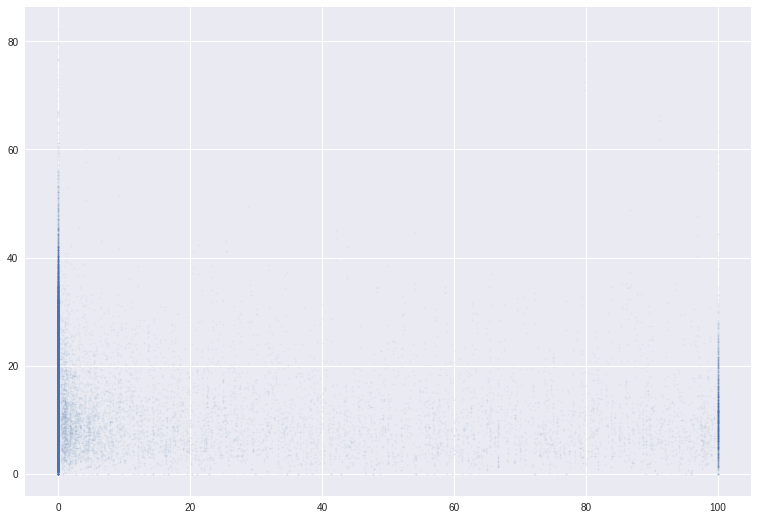

            Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prop_uninsured
No. Observations:  80489   Method:             REML          
No. Groups:        27153   Scale:              10.2246       
Min. group size:   1       Likelihood:         -246785.2553  
Max. group size:   3       Converged:          Yes           
Mean group size:   3.0                                       
-------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept         12.440    0.049 252.733 0.000 12.343 12.536
perc_tech50_avail -0.020    0.002  -8.173 0.000 -0.025 -0.015
groups RE         57.830    0.203                            

prop_all_25_to_29


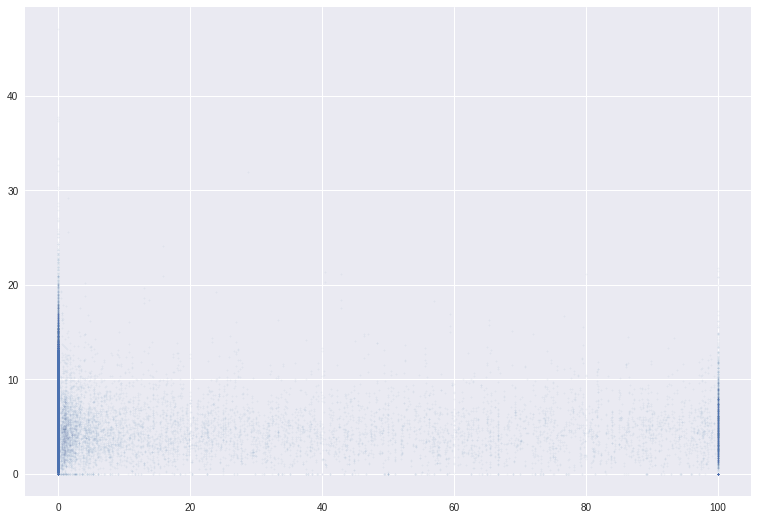

             Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: prop_all_25_to_29
No. Observations: 80489   Method:             REML             
No. Groups:       27153   Scale:              2.6183           
Min. group size:  1       Likelihood:         -183505.8753     
Max. group size:  3       Converged:          Yes              
Mean group size:  3.0                                          
---------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept            4.892    0.018 268.212 0.000  4.857  4.928
perc_tech50_avail   -0.000    0.001  -0.338 0.735 -0.002  0.001
groups RE            7.529    0.055                            



In [12]:
query_ra_fiber_no_change = """
SELECT block_group_code,prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2014_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2015_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)

UNION ALL

SELECT block_group_code, prop_white, prop_black, prop_asian, employment_rate, prop_educ_college_educ, prop_uninsured, median_home_value, prop_all_25_to_29, median_household_income_in_the_past_12_months, population_density, perc_tech50_avail
FROM broadband.fcc_acs_with_geo_and_props_2016_table
WHERE median_home_value > 0 AND perc_urban < 0.2 AND block_group_code IN (SELECT block_group_code FROM broadband.blockgroup_fiber_no_change)
"""



df = pd.read_gbq(query_ra_fiber_no_change, project_id='fccdsicapstone-218522', dialect='standard')
for prop in list_prop:
  df[prop] *= 100

for var in list_var:    
    print(var)
    viz(df, var, var in list_log)
    model = mix_model(df, var)
    print(model.summary())

### Ordinary Linear Regression below

In [0]:
# model = smf.OLS(df_has_fiber["median_home_value"], df_has_fiber[["perc_tech50_avail","const"]])
# results = model.fit()
# results.summary()